In [1]:
org_name = 'mbry'
org_full_name = 'Methylocystis_bryophila'

In [2]:
import myModules.buildmodel as BM

In [17]:
import cobra
model = cobra.io.read_sbml_model(org_name+'\\11_'+org_name+'_complate_model_V2.xml')

In [3]:
model

<Model Methylocystis_bryophila at 0x1e96a8bc1f0>

In [4]:
model.summary()

## flux_variability_analysis

In [120]:
from cobra.flux_analysis import flux_variability_analysis

In [121]:
flux_variability_analysis(model, model.reactions).to_csv('flux_variability_analysis.csv')

## experiment data

In [3]:
H_model = model.copy()
M_model = model.copy()
L_model = model.copy()
dtuH_model = model.copy()
dtuM_model = model.copy()
dtuL_model = model.copy()
dtueL_model = model.copy()

### for flux fig

In [12]:
model.reactions.EX_ch4_e.bounds = (-100,-100)
model.reactions.EX_o2_e.bounds = (-131,-131)
model.reactions.EX_co2_e.bounds = (60,60)
model.reactions.ACS.bounds = (0,0)
#model.reactions.r0068.bounds = (0,0)
model.optimize().fluxes.to_csv('mbry\\12_wildtype_fluxes_high.csv')

In [18]:
model.reactions.EX_ch4_e.bounds = (-100,-100)
model.reactions.EX_o2_e.bounds = (-122,-122)
model.reactions.EX_co2_e.bounds = (52,52)
model.reactions.ACS.bounds = (0,0)
model.reactions.ATPS.bounds = (0,30)
#model.reactions.r0068.bounds = (0,0)
model.optimize().fluxes.to_csv('mbry\\12_wildtype_fluxes_low.csv')

In [19]:
model.summary()

In [22]:
model.reactions.PPS

<Reaction PPS at 0x293723cd820>

In [21]:
model.metabolites.get_by_id('ac_c').summary()

In [20]:
model.metabolites.get_by_id('atp_c').summary()

### high O2 EST

In [15]:
H_model.reactions.EX_ch4_e.bounds = (-100,-100)
H_model.reactions.EX_o2_e.bounds = (-131,-131)
H_model.reactions.EX_co2_e.bounds = (60,60)
H_model.reactions.ATPS.bounds = (0,1000)

In [16]:
H_model.summary()

In [17]:
H_model.metabolites.h_e.summary()

In [18]:
H_model.metabolites.ac_c.summary()

In [20]:
H_model.metabolites.atp_c.summary()

### middle o2 est

In [46]:
M_model.reactions.EX_ch4_e.bounds = (-100,-100)
M_model.reactions.EX_o2_e.bounds = (-122,-122)
M_model.reactions.EX_co2_e.bounds = (52,52)
M_model.reactions.ATPS.bounds = (0,25)     # (0,87)    (0-100 limtid)


In [47]:
M_model.summary()

In [48]:
M_model.metabolites.ac_c.summary()

In [49]:
M_model.metabolites.atp_c.summary()

### low o2 est

In [54]:
L_model.reactions.EX_ch4_e.bounds = (-100,-100)
L_model.reactions.EX_o2_e.bounds = (-101,-101)
L_model.reactions.EX_co2_e.bounds = (46,46)
L_model.reactions.ATPS.bounds = (0,30)     # (0,1000)    (0-87 limtid)

In [53]:
L_model.summary()

In [214]:
L_model.metabolites.ac_c.summary()

In [215]:
L_model.metabolites.atp_c.summary()

###   High DTU

In [218]:
dtuH_model.reactions.EX_ch4_e.bounds = (-100,-100)
dtuH_model.reactions.EX_o2_e.bounds = (-150,-150)
dtuH_model.reactions.EX_co2_e.bounds = (43,43)

In [220]:
dtuH_model.summary()

In [223]:
dtuH_model.metabolites.ac_c.summary()

In [224]:
dtuH_model.metabolites.atp_c.summary()

###   Middle DTU

In [230]:
dtuM_model.reactions.EX_ch4_e.bounds = (-100,-100)
dtuM_model.reactions.EX_o2_e.bounds = (-157,-157)
dtuM_model.reactions.EX_co2_e.bounds = (50,50)

In [ ]:
dtuM_model.reactions.ATPS.bounds = (0,1000)     # (0,1000)

In [232]:
dtuM_model.summary()

In [233]:
dtuM_model.metabolites.ac_c.summary()

In [229]:
dtuM_model.metabolites.atp_c.summary()

###   Low DTU

In [234]:
dtuL_model.reactions.EX_ch4_e.bounds = (-100,-100)
dtuL_model.reactions.EX_o2_e.bounds = (-160,-160)
dtuL_model.reactions.EX_co2_e.bounds = (53,53)

In [ ]:
dtuL_model.reactions.ATPS.bounds = (0,1000)     # (0,1000)

In [236]:
dtuL_model.summary()

In [237]:
dtuL_model.metabolites.ac_c.summary()

In [238]:
dtuL_model.metabolites.atp_c.summary()

###  Extreme Low DTU

In [242]:
dtueL_model.reactions.EX_ch4_e.bounds = (-100,-100)
dtueL_model.reactions.EX_o2_e.bounds = (-151,-151)
dtueL_model.reactions.EX_co2_e.bounds = (55,55)

In [ ]:
dtueL_model.reactions.ATPS.bounds = (0,1000)     # (0,1000)

In [244]:
dtueL_model.summary()

In [245]:
dtueL_model.metabolites.ac_c.summary()

In [246]:
dtueL_model.metabolites.atp_c.summary()

## mapping data

modify and run 

`python mbry\\mappingFBA.py`



In [ ]:
'''
import cobra
import re
import pandas as pd
from multiprocessing import Pool


def extract_result_data(model):
    try:
        model.summary()
    except:
        return [None, None, None, None, None, None]
    summary_string = model.summary().to_string()
    # 匹配object数值
    object_value = re.search(r'(?<=1.0 DM_mbry_biomass_c = )\d+(\.\d+)?', summary_string)
    object_value = float(object_value.group()) if object_value else None
    # 匹配分泌biomass、ac_e、co2_e的C-Flux比例
    lines1 = re.findall(r'(\w+\s+DM_\w+\s+-\d+(\.\d+)?\s+\d+\s+\d+(\.\d+)?)', summary_string)
    lines = re.findall(r'(\w+\s+EX_\w+\s+-\d+(\.\d+)?\s+\d+\s+\d+(\.\d+)?)', summary_string)
    fluxes = {}
    for line in lines1 + lines:
        parts = line[0].split()
        fluxes[parts[1]] = float(parts[-1])
    # 将数据存储在列表中并返回
    return [object_value,fluxes.get('DM_mbry_biomass_c'),fluxes.get('EX_ac_e'),fluxes.get('EX_co2_e'),fluxes.get('EX_meoh_e'),fluxes.get('EX_succ_e')]
def range_test(model,O2,atp_ub=1000,CO2_lb=20,CO2_ub=70):
    data_df = pd.DataFrame(columns=['O2','CO2','object_value','biomass_flux','ac_e_flux','co2_e_flux','meoh_e_flux','succ_e_flux'])
    model.reactions.ATPS.bounds = (0,atp_ub)
    #for O2 in range(O2_lb,O2_ub,1):
    for CO2 in range(CO2_lb,CO2_ub,1):
        #print(O2,CO2)
        model_copy = model.copy()
        model_copy.reactions.EX_o2_e.bounds = (-O2,-O2)
        model_copy.reactions.EX_co2_e.bounds = (CO2,CO2)
        try:
            results= extract_result_data(model_copy)
            data_df.loc[len(data_df)] = [O2/100,CO2/100] + results
        except Exception as e:
            print("An error occurred: ", e)
            data_df.loc[len(data_df)] = [O2/100,CO2/100] + [None]*5
    data_df.to_csv(f'mbry\\mappingFBA\\{O2}.csv',index=False)
    return data_df

if __name__ == '__main__':

    org_name = 'mbry'
    org_full_name = 'Methylocystis_bryophila'
    model = cobra.io.read_sbml_model(org_name+'\\11_'+org_name+'_complate_model_V2.xml')
    model.reactions.EX_ch4_e.bounds = (-100,-100)

    with Pool(processes=12) as pool:
        results = pool.starmap(range_test, [(model, O2) for O2 in range(101, 161)])


'''

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

config = {
    "font.family":'Arial', # sans-serif/serif/cursive/fantasy/monospace
    "font.size": 12, # medium/large/small
    'font.style':'normal', # normal/italic/oblique
    'font.weight':'normal', # bold
    "mathtext.fontset":'cm',# 'cm' (Computer Modern)
    #"font.serif": ['cmb10'], # 'Simsun'宋体
    "axes.unicode_minus": False,# 用来正常显示负号
}
plt.rcParams.update(config)

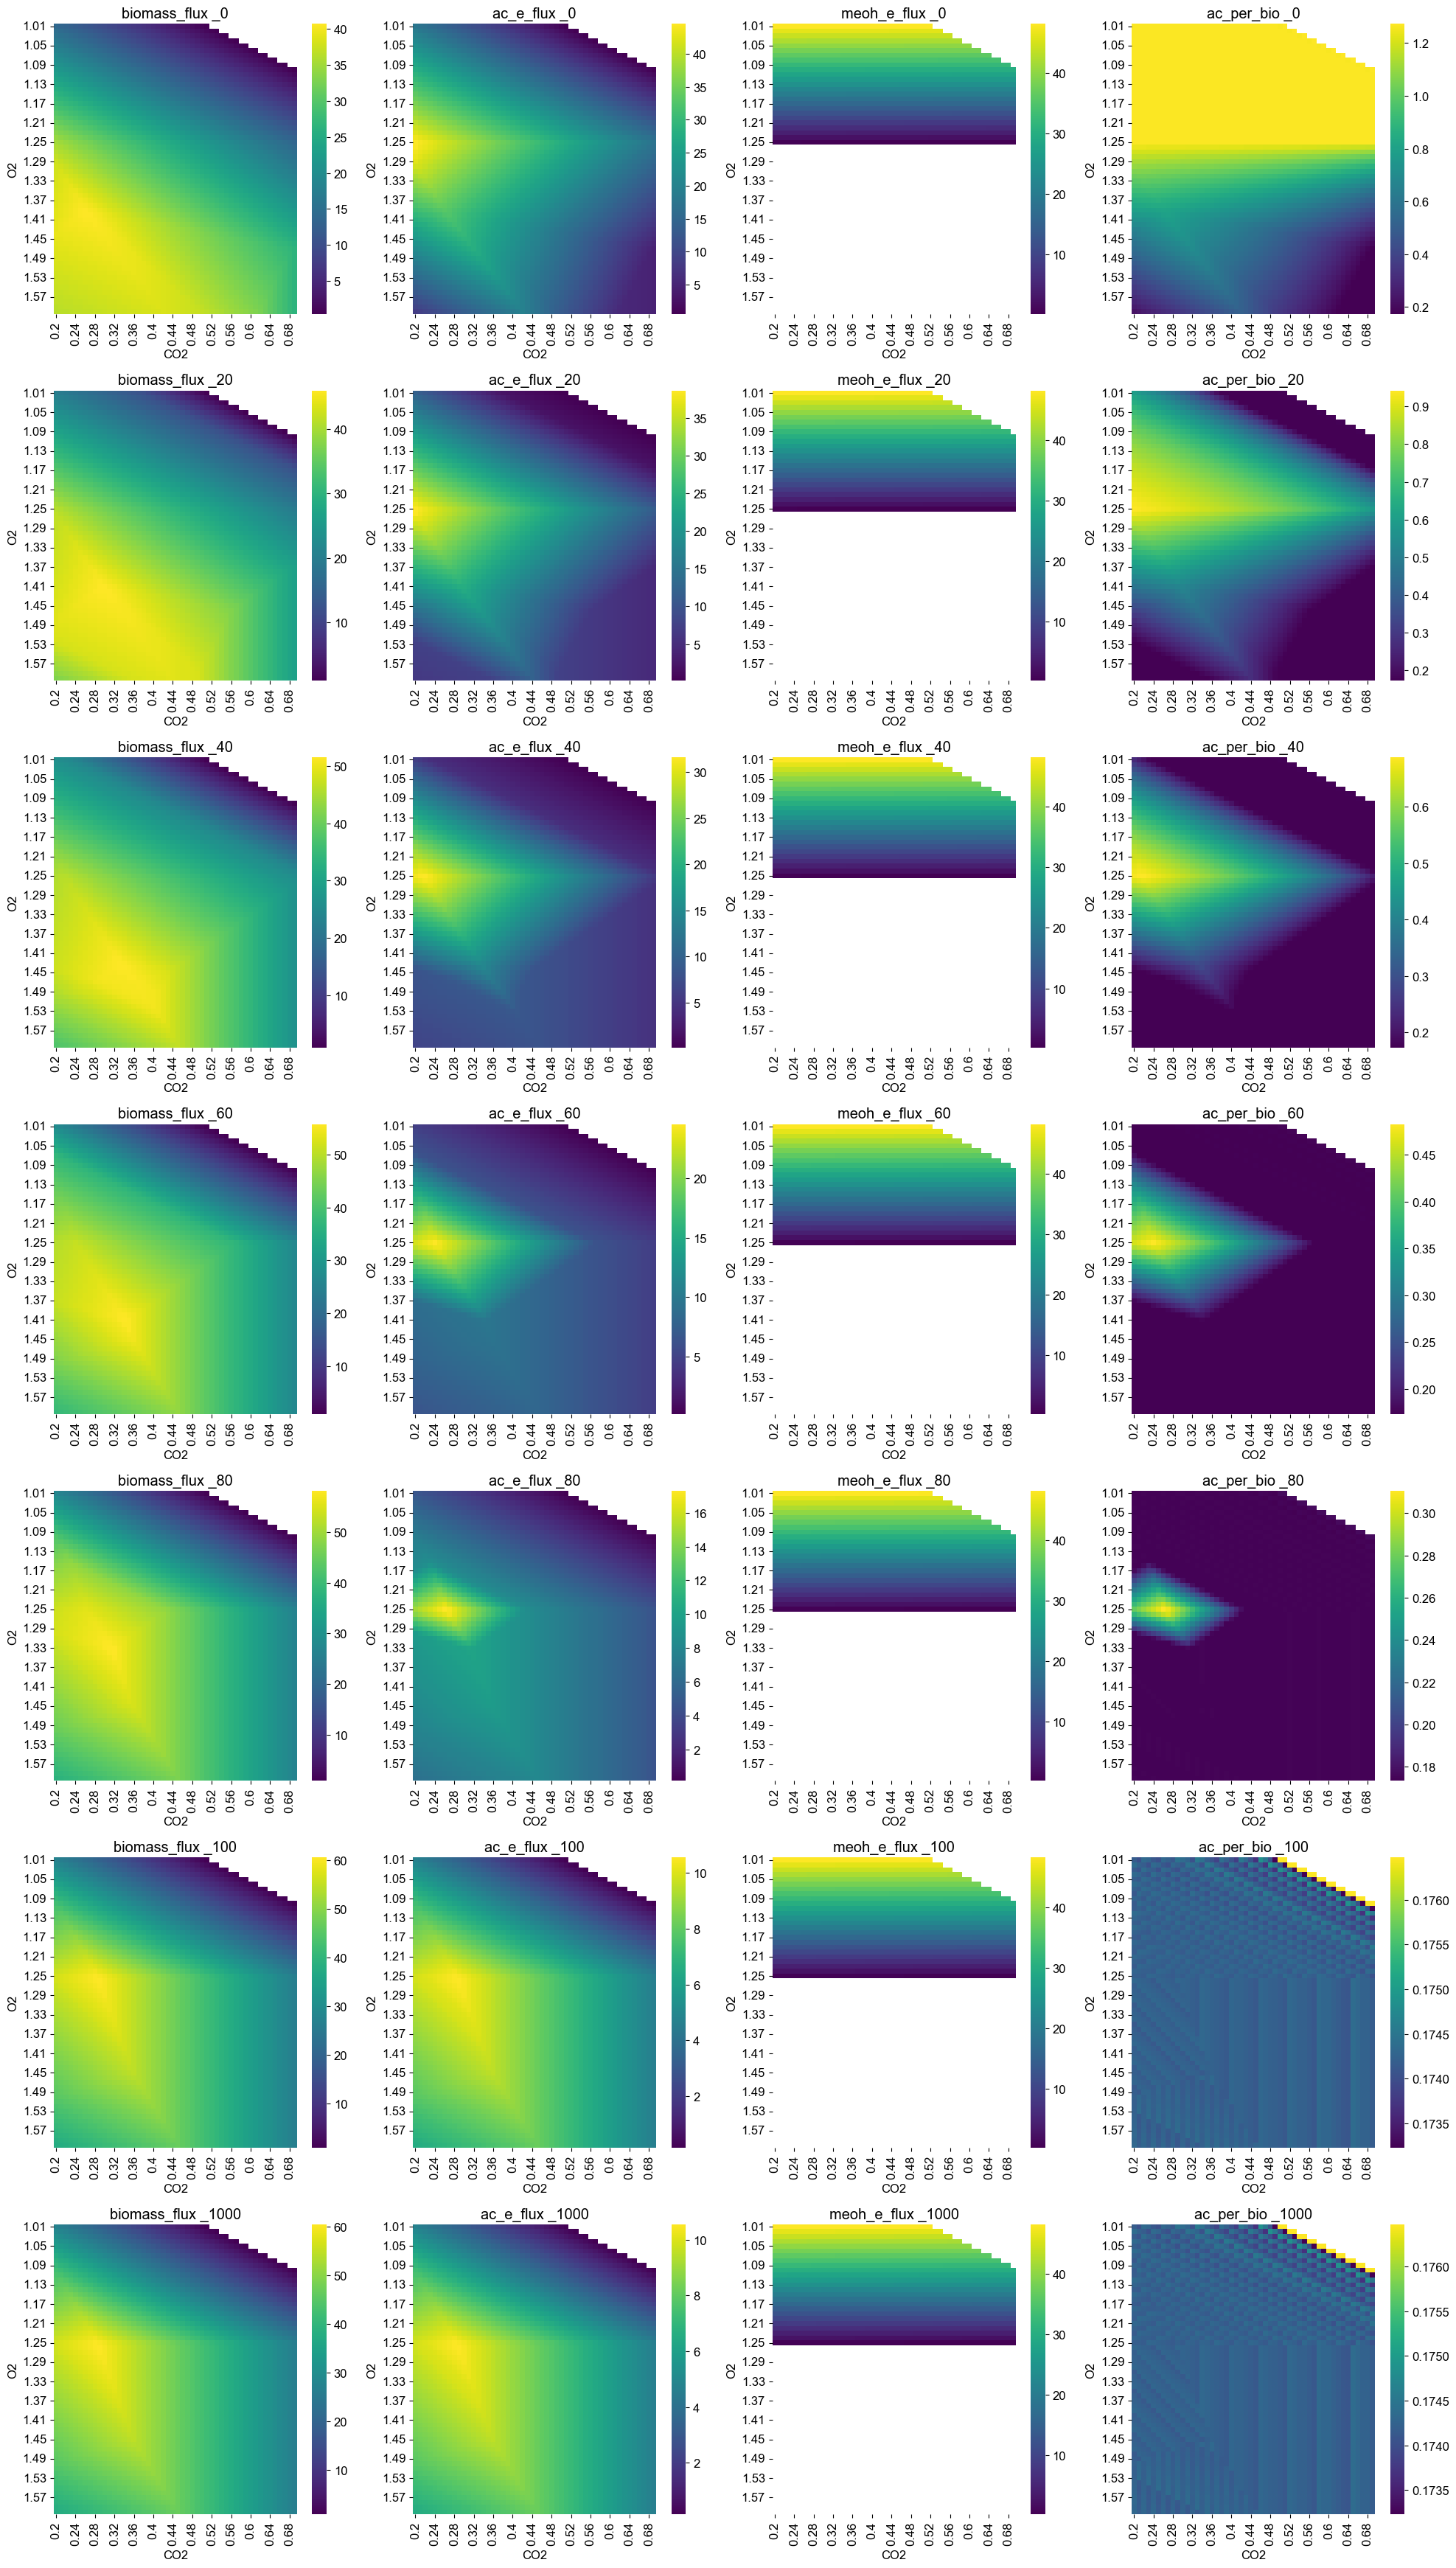

In [56]:
import pandas as pd
import glob
import seaborn as sns

# 文件名后缀列表
suffixes = ['_0', '_20', '_40', '_60', '_80', '_100', '_1000']

# 设置子图布局
num_cols = 4  # 每行显示 4 个子图
num_rows = len(suffixes)

# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

for row_idx, suffix in enumerate(suffixes):
    csv_files = glob.glob(f'mbry\\mappingFBA\\*{suffix}.csv')
    df_list = [pd.read_csv(file) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    df['ac_per_bio'] = df['ac_e_flux']/df['biomass_flux'] if df['biomass_flux'] is not None else None

    heatmap_data = df.pivot(index='O2', columns='CO2')

    # 获取 z 列的列名
    z_columns = df.columns[[3,4,6,8]]

    # 绘制每个子图的热力图
    for idx, z_col in enumerate(z_columns):
        col_idx = idx % num_cols
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sns.heatmap(df.pivot(index='O2', columns='CO2', values=z_col), annot=False, cmap='viridis', ax=ax)
        ax.set_title(f'{z_col} {suffix}')

# 调整布局
plt.tight_layout()
plt.savefig('mbry\\mappingFBA.pdf')
plt.show()

In [7]:
import re
import cobra
model = cobra.io.read_sbml_model(org_name+'\\11_'+org_name+'_complate_model_V2.xml')
model.reactions.EX_ch4_e.bounds = (-100,-100)

def extract_result_data(model):
    try:
        model.summary()
    except:
        return [None, None, None, None, None, None]
    summary_string = model.summary().to_string()
    # 匹配object数值
    object_value = re.search(r'(?<=1.0 DM_mbry_biomass_c = )\d+(\.\d+)?', summary_string)
    object_value = float(object_value.group()) if object_value else None
    # 匹配分泌biomass、ac_e、co2_e的C-Flux比例
    lines1 = re.findall(r'(\w+\s+DM_\w+\s+-\d+(\.\d+)?\s+\d+\s+\d+(\.\d+)?)', summary_string)
    lines = re.findall(r'(\w+\s+EX_\w+\s+-\d+(\.\d+)?\s+\d+\s+\d+(\.\d+)?)', summary_string)
    fluxes = {}
    for line in lines1 + lines:
        parts = line[0].split()
        fluxes[parts[1]] = float(parts[-1])
    # 将数据存储在列表中并返回
    return [object_value,fluxes.get('DM_mbry_biomass_c'),fluxes.get('EX_ac_e'),fluxes.get('EX_co2_e'),fluxes.get('EX_meoh_e'),fluxes.get('EX_succ_e')]
def range_test(model,atp_ub=80,O2=125,CO2=20):
    model_copy = model.copy()
    model_copy.reactions.ATPS.bounds = (0,atp_ub)
    model_copy.reactions.EX_o2_e.bounds = (-O2,-O2)
    model_copy.reactions.EX_co2_e.bounds = (CO2,CO2)
    try:
        results= extract_result_data(model_copy)
    except Exception as e:
        print("An error occurred: ", e)
        results = [None]*6
    if results[1] is None:
        return None
    Ac_Biomass = results[2]/results[1]
    return Ac_Biomass

atp_list = list(range(0,120,5))
ac_bio_list = []
for atp_ub in atp_list:
    ac_bio = range_test(model,atp_ub=atp_ub)
    ac_bio_list.append(ac_bio)
    #print(atp_ub,ac_bio)


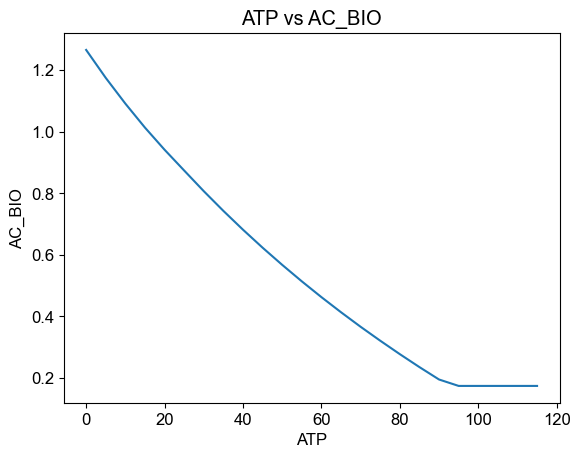

In [8]:
plt.plot(atp_list, ac_bio_list)
plt.xlabel('ATP')
plt.ylabel('AC_BIO')
plt.title('ATP vs AC_BIO')
plt.savefig('mbry\\ATP_flux_vs_AC_BIO.pdf')
plt.show()